In [1]:
%reset -f

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, LSTM , Input, Lambda, SimpleRNN
from sklearn.cluster import DBSCAN
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, f1_score, confusion_matrix
from sklearn.decomposition import PCA
from tensorflow.keras.callbacks import Callback
import time
import random
import logging

In [2]:
print('TF version:',tf.__version__) 
print('Numpy version:',np.__version__) 
print('Pandas version:',pd.__version__) 

TF version: 2.3.0
Numpy version: 1.19.5
Pandas version: 1.2.4


In [3]:
DATA_DIR = 'C:\\Users\\DELL\Desktop\\Imperial-Masters study\\MSc Project- Spike Sorting\\Modules for Spike Sorting\\TrainingData'

## 1. Data Loading, Normalization and Preprocessing,

In [4]:
def load_data(directory):
    all_signals = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith('.txt'):
                file_path = os.path.join(root, file)
                print(f"Loading file: {file_path}")
                with open(file_path, 'r') as f:
                    for line in f:
                        data = [float(value) for value in line.split()]
                        if data:  # Ensure non-empty data
                            all_signals.append(data)
    max_length = max(len(signal) for signal in all_signals)
    padded_signals = [signal + [0] * (max_length - len(signal)) for signal in all_signals]
    return np.array(padded_signals)

# Measure time to run load_data
start_time = time.time()
data = load_data(DATA_DIR)
load_time = time.time() - start_time
print(f"Data loading time: {load_time:.2f} seconds")

Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\1\Good\0.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\1\Good\1.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\1\Good\10.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\1\Good\100.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\1\Good\101.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\1\Good\102.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\1\Good\103.txt
Loading file: C:\Users\DE

Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\1\Good\47.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\1\Good\48.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\1\Good\49.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\1\Good\5.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\1\Good\50.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\1\Good\51.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\1\Good\52.txt
Loading file: C:\Users\DELL\

Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\10\Good\17.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\10\Good\18.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\10\Good\19.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\10\Good\2.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\10\Good\20.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\10\Good\21.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\10\Good\22.txt
Loading file: C:\User

Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\12\Good\42.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\12\Good\43.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\12\Good\44.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\12\Good\45.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\12\Good\46.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\12\Good\47.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\12\Good\48.txt
Loading file: C:\Use

Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\14\Good\29.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\14\Good\3.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\14\Good\30.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\14\Good\31.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\14\Good\32.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\14\Good\33.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\14\Good\34.txt
Loading file: C:\User

Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\15\Good\34.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\15\Good\35.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\15\Good\36.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\15\Good\37.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\15\Good\38.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\15\Good\4.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\15\Good\5.txt
Loading file: C:\Users

Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\19\Good\2.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\19\Good\3.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\19\Good\4.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\19\Good\5.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\19\Good\6.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\19\Good\7.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\19\Good\8.txt
Loading file: C:\Users\DELL

Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\2\Good\58.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\2\Good\59.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\2\Good\6.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\2\Good\60.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\2\Good\61.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\2\Good\62.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\2\Good\63.txt
Loading file: C:\Users\DELL\

Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\21\Good\45.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\21\Good\46.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\21\Good\47.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\21\Good\48.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\21\Good\49.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\21\Good\5.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\21\Good\50.txt
Loading file: C:\User

Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\22\Good\20.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\22\Good\21.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\22\Good\22.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\22\Good\3.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\22\Good\4.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\22\Good\5.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\22\Good\6.txt
Loading file: C:\Users\D

Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\24\Good\13.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\24\Good\14.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\24\Good\15.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\24\Good\16.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\24\Good\17.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\24\Good\18.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\24\Good\19.txt
Loading file: C:\Use

Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\26\Good\10.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\26\Good\11.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\26\Good\12.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\26\Good\13.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\26\Good\14.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\26\Good\15.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\26\Good\16.txt
Loading file: C:\Use

Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\27\Good\3.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\27\Good\30.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\27\Good\31.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\27\Good\32.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\27\Good\33.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\27\Good\34.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\27\Good\35.txt
Loading file: C:\User

Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\28\Good\20.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\28\Good\21.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\28\Good\22.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\28\Good\23.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\28\Good\24.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\28\Good\25.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\28\Good\26.txt
Loading file: C:\Use

Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\29\Good\7.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\29\Good\8.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\29\Good\9.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\3\Good\0.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\3\Good\1.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\3\Good\10.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\3\Good\11.txt
Loading file: C:\Users\DELL\D

Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\3\Good\61.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\3\Good\62.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\3\Good\63.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\3\Good\64.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\3\Good\65.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\3\Good\66.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\3\Good\67.txt
Loading file: C:\Users\DELL

Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\31\Bad\128.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\31\Bad\129.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\31\Bad\130.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\31\Bad\131.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\31\Bad\132.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\31\Bad\133.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\31\Bad\134.txt
Loading file: C:\Use

Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\31\Bad\199.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\31\Bad\200.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\31\Bad\201.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\31\Bad\202.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\31\Bad\203.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\31\Bad\204.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\31\Bad\205.txt
Loading file: C:\Use

Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\31\Bad\310.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\31\Bad\311.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\31\Bad\312.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\31\Bad\313.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\31\Bad\314.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\31\Bad\315.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\31\Bad\316.txt
Loading file: C:\Use

Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\31\Bad\385.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\31\Bad\386.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\31\Bad\387.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\31\Bad\388.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\31\Bad\389.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\31\Bad\390.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\31\Bad\391.txt
Loading file: C:\Use

Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\31\Bad\482.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\31\Bad\483.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\31\Bad\484.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\31\Bad\485.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\31\Bad\486.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\31\Bad\487.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\31\Bad\488.txt
Loading file: C:\Use

Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\31\Bad\89.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\31\Bad\90.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\31\Bad\91.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\31\Bad\92.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\31\Bad\93.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\31\Bad\94.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\31\Bad\95.txt
Loading file: C:\Users\DELL

Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\31\Good\147.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\31\Good\148.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\31\Good\149.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\31\Good\15.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\31\Good\150.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\31\Good\151.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\31\Good\152.txt
Loading file: 

Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\31\Good\65.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\31\Good\66.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\31\Good\67.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\31\Good\68.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\31\Good\69.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\31\Good\7.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\31\Good\70.txt
Loading file: C:\User

Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\6\Good\2.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\6\Good\20.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\6\Good\21.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\6\Good\22.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\6\Good\23.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\6\Good\24.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\6\Good\25.txt
Loading file: C:\Users\DELL\

Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\8\Good\12.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\8\Good\13.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\8\Good\14.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\8\Good\15.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\8\Good\16.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\8\Good\17.txt
Loading file: C:\Users\DELL\Desktop\Imperial-Masters study\MSc Project- Spike Sorting\Modules for Spike Sorting\TrainingData\8\Good\18.txt
Loading file: C:\Users\DELL

Data normalization completed.


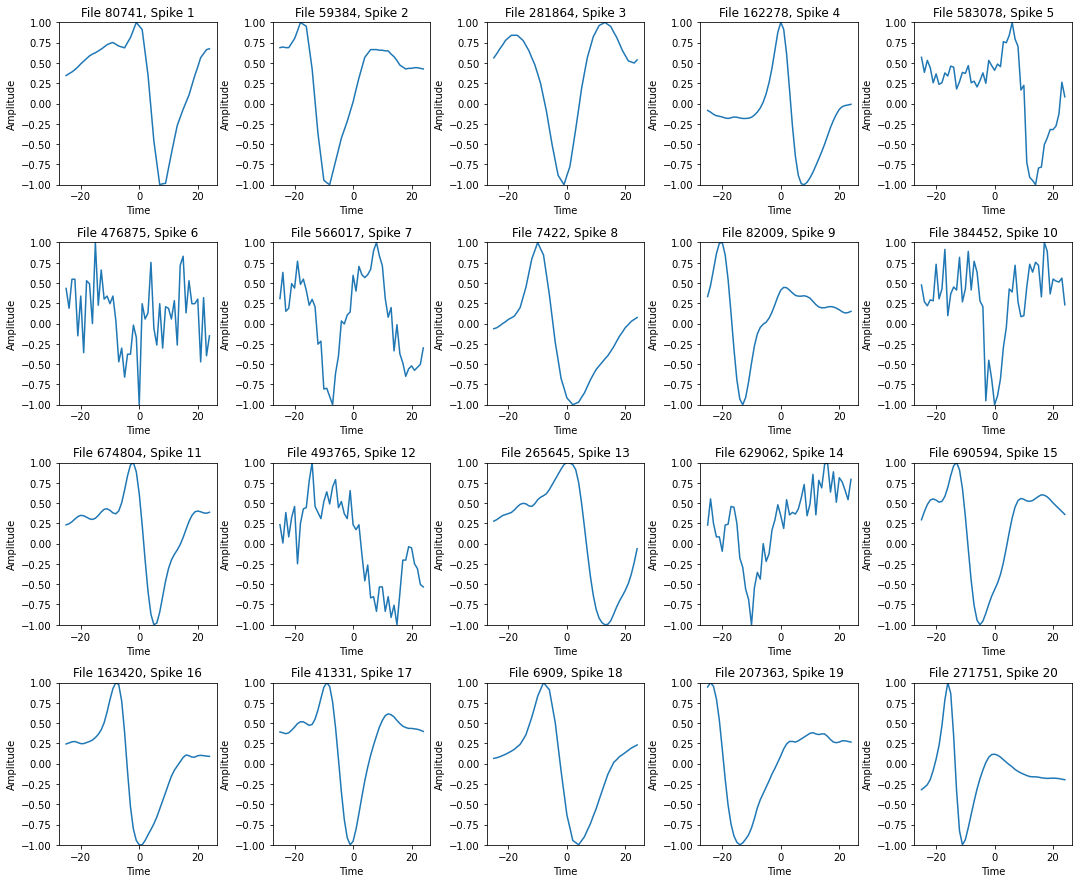

In [5]:
def normalize_spike(spike):
    # Normalize a single spike to the range [-1, 1]
    min_val = np.min(spike)
    max_val = np.max(spike)
    normalized_spike = 2 * (spike - min_val) / (max_val - min_val) - 1
    return normalized_spike

def visualize_unique_spikes(signals, num_spikes=20, spike_length=50):
    total_signals = signals.shape[0]
    signal_length = signals.shape[1]
    if spike_length > signal_length:
        raise ValueError("spike_length is greater than the signal length")

    unique_spikes = set()
    spikes = []

    while len(spikes) < num_spikes:
        signal_idx = random.randint(0, total_signals - 1)
        spike_start = random.randint(spike_length // 2, signal_length - spike_length // 2 - 1)

        # Handle edge cases where spike length might be invalid
        if spike_start < spike_length // 2 or spike_start + spike_length // 2 > signal_length:
            continue

        spike = signals[signal_idx, spike_start - spike_length // 2 : spike_start + spike_length // 2]

        spike_tuple = tuple(spike)
        if spike_tuple not in unique_spikes and np.var(spike) > 0.01:
            unique_spikes.add(spike_tuple)
            normalized_spike = normalize_spike(spike)
            spikes.append((normalized_spike, signal_idx, spike_start))

    plt.figure(figsize=(15, 15))

    for i, (spike, signal_idx, spike_start) in enumerate(spikes):
        plt.subplot(5, 5, i + 1)
        plt.plot(range(-spike_length // 2, spike_length // 2), spike)  # Making the spike in the centre of the plot
        plt.ylim(-1, 1)
        plt.title(f'File {signal_idx + 1}, Spike {i + 1}')
        plt.xlabel('Time')
        plt.ylabel('Amplitude')

    plt.tight_layout()
    plt.show()

# Normalize data to range [-1, 1] for visualization
normalized_data = np.array([normalize_spike(spike) for spike in data])
print("Data normalization completed.")
visualize_unique_spikes(normalized_data, num_spikes=20, spike_length=50)

In [ ]:
# Check normalization of the data
means = np.mean(normalized_data, axis=1)
stds = np.std(normalized_data, axis=1)
print(f'Means: min={np.min(means)}, max={np.max(means)}, mean={np.mean(means)}')
print(f'Standard deviations: min={np.min(stds)}, max={np.max(stds)}, mean={np.mean(stds)}')

# statistics for the entire dataset
overall_mean = np.mean(normalized_data)
overall_std = np.std(normalized_data)
print(f'Overall mean: {overall_mean}')
print(f'Overall std: {overall_std}')

In [6]:
def print_file_info(directory):
    total_size = 0
    num_files = 0
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith('.txt'):
                num_files += 1
                file_path = os.path.join(root, file)
                total_size += os.path.getsize(file_path)

    # Converting total size to MB
    total_size_mb = total_size / (1024 * 1024)

    print(f"Total size of .txt files processed: {total_size_mb:.2f} MB")
    print(f"Number of .txt files processed: {num_files}")
    
print_file_info(DATA_DIR)

Total size of .txt files processed: 188.65 MB
Number of .txt files processed: 1772


## PCA and K-Means

In [7]:
# Standardize the features before clustering
scaler = StandardScaler()
features_standardized = scaler.fit_transform(normalized_data)

print("Feature standardization completed.")

Feature standardization completed.


Original number of features: 81
Reduced number of features after PCA: 29


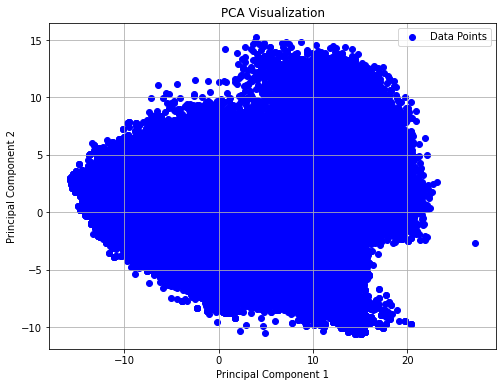

In [8]:
pca = PCA(n_components=0.95)  # Keep 95% of the variance
features_pca = pca.fit_transform(features_standardized)

print(f"Original number of features: {features_standardized.shape[1]}")
print(f"Reduced number of features after PCA: {features_pca.shape[1]}")

plt.figure(figsize=(8, 6))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c='b', marker='o', label='Data Points')
plt.title('PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

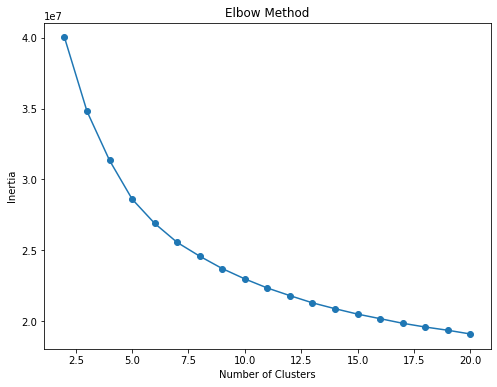

Optimal number of clusters: 7


In [9]:
# optimal number of clusters using the elbow method
inertia = []
cluster_range = range(2, 21)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(features_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# "elbow point" method to find the optimal number of clusters
def optimal_number_of_clusters(inertia, cluster_range):
    x1, y1 = cluster_range[0], inertia[0]
    x2, y2 = cluster_range[-1], inertia[-1]
    
    distances = []
    for i in range(len(inertia)):
        x0 = cluster_range[i]
        y0 = inertia[i]
        numerator = abs((y2 - y1)*x0 - (x2 - x1)*y0 + x2*y1 - y2*x1)
        denominator = np.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator / denominator)
    
    return cluster_range[np.argmax(distances)]

optimal_clusters = optimal_number_of_clusters(inertia, list(cluster_range))
print(f"Optimal number of clusters: {optimal_clusters}")

In [10]:
# Perform k-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(features_pca)

print("K-means clustering completed.")

K-means clustering completed.


In [ ]:
# Color palette for clusters
colors = plt.cm.get_cmap('tab10', optimal_clusters)

def visualize_clusters_scatter(data_pca, labels, n_clusters, colors):
    plt.figure(figsize=(12, 8))
    for cluster in range(n_clusters):
        cluster_indices = np.where(labels == cluster)[0]
        plt.scatter(data_pca[cluster_indices, 0], data_pca[cluster_indices, 1], 
                    label=f'Cluster {cluster + 1}', alpha=0.6, color=colors(cluster))
    
    plt.title('Scatter Plot of Clusters')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.show()

def visualize_waveforms_with_average(data, labels, n_clusters, colors):
    n_cols = 3
    n_rows = (n_clusters + n_cols - 1) // n_cols  # Ceiling division

    plt.figure(figsize=(n_cols * 6, n_rows * 4))  # Adjusting figure size based on number of rows and columns
    for cluster in range(n_clusters):
        plt.subplot(n_rows, n_cols, cluster + 1)
        cluster_indices = np.where(labels == cluster)[0]
        cluster_waveforms = data[cluster_indices]
        
        # Plot all waveforms in light color
        for waveform in cluster_waveforms:
            plt.plot(waveform, color=colors(cluster), alpha=0.1)
        
        # Plot average waveform in darker color
        avg_waveform = np.mean(cluster_waveforms, axis=0)
        plt.plot(avg_waveform, color=colors(cluster), linewidth=2)
        
        plt.title(f'Cluster {cluster + 1}')
        plt.xlabel('Time')
        plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()

    for cluster in range(n_clusters):
        cluster_indices = np.where(labels == cluster)[0]
        print(f"Cluster {cluster + 1}: {len(cluster_indices)} spikes")

# Visualize clusters in PCA space
visualize_clusters_scatter(features_pca, cluster_labels, optimal_clusters, colors)

# Visualize waveforms with average waveform
visualize_waveforms_with_average(normalized_data, cluster_labels, optimal_clusters, colors)

In [ ]:
# Use the normalized data as X and cluster labels as y
X = normalized_data.reshape(normalized_data.shape[0], normalized_data.shape[1], 1)  # Reshape for 1D CNN input
y = cluster_labels  # Use cluster labels as the target

print("Data prepared for 1D CNN.")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

In [15]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [ ]:
X = normalized_data.reshape(normalized_data.shape[0], normalized_data.shape[1], 1)
y = cluster_labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X train-", X_train.shape)
print("X test-", X_test.shape)
print("Y train-", y_train.shape)
print("Y test-", y_test.shape)

# 1D CNN model for multi-class classification
def build_cnn_model(input_shape, num_classes):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(128, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(256, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
                  loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

input_shape = (X_train.shape[1], X_train.shape[2])
num_classes = optimal_clusters
cnn_model = build_cnn_model(input_shape, num_classes)

# Train the model
history = cnn_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = cnn_model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

In [ ]:
def plot_training_curves(history):
    print("Available keys in history:", history.history.keys())

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    if 'accuracy' in history.history and 'val_accuracy' in history.history:
        ax1.plot(history.history['accuracy'], label='Train Accuracy')
        ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
        ax1.set_title('Model Accuracy')
        ax1.set_ylabel('Accuracy')
        ax1.set_xlabel('Epoch')
        ax1.legend(loc='upper left')

    if 'loss' in history.history and 'val_loss' in history.history:
        ax2.plot(history.history['loss'], label='Train Loss')
        ax2.plot(history.history['val_loss'], label='Validation Loss')
        ax2.set_title('Model Loss')
        ax2.set_ylabel('Loss')
        ax2.set_xlabel('Epoch')
        ax2.legend(loc='upper left')

    plt.tight_layout()
    plt.show()

plot_training_curves(history)

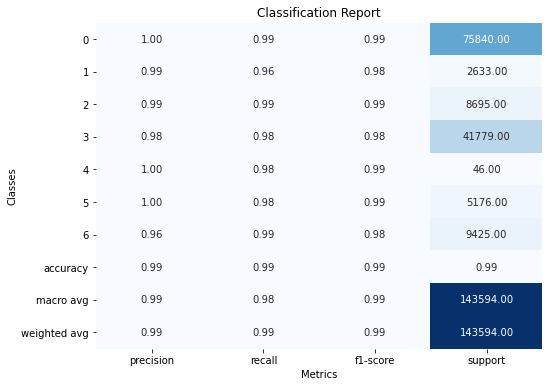

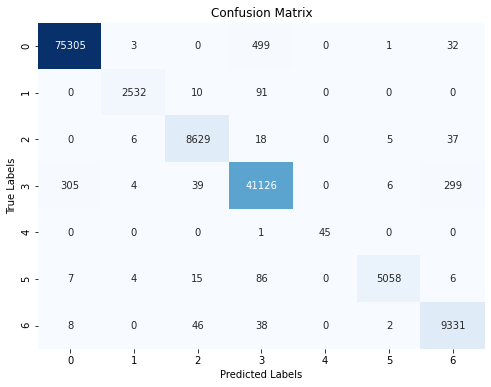

In [19]:
# Convert final predictions to class labels (assuming final_predictions are probabilities)
predicted_labels = np.argmax(final_predictions, axis=1)

class_report = classification_report(y_test, predicted_labels, output_dict=True)
class_report_df = pd.DataFrame(class_report).transpose()
plt.figure(figsize=(8, 6))
sns.heatmap(class_report_df, annot=True, cmap='Blues', fmt='.2f', cbar=False)
plt.title("Classification Report")
plt.xlabel("Metrics")
plt.ylabel("Classes")
plt.show()

conf_matrix = confusion_matrix(y_test, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


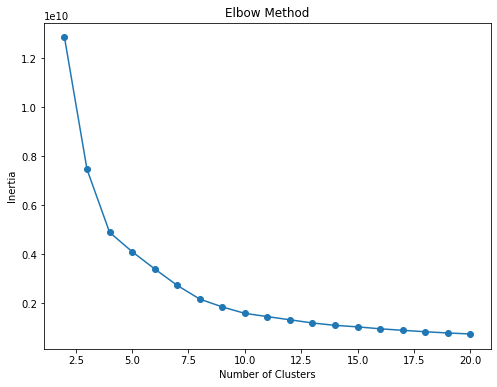

Optimal number of clusters for shape similarity: 6


In [20]:
# Extract features from the CNN for 2nd round of clustering (to separate based on shape too)
intermediate_layer_model = Model(inputs=cnn_model.input, outputs=cnn_model.layers[-3].output)
cnn_features = intermediate_layer_model.predict(X)

def determine_optimal_clusters(features):
    inertia = []
    cluster_range = range(2, min(21, len(features)))

    for n_clusters in cluster_range:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans.fit(features)
        inertia.append(kmeans.inertia_)

    plt.figure(figsize=(8, 6))
    plt.plot(cluster_range, inertia, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Method')
    plt.show()

    # elbow method to find the optimal number of clusters
    def optimal_number_of_clusters(inertia, cluster_range):
        x1, y1 = cluster_range[0], inertia[0]
        x2, y2 = cluster_range[-1], inertia[-1]

        distances = []
        for i in range(len(inertia)):
            x0 = cluster_range[i]
            y0 = inertia[i]
            numerator = abs((y2 - y1) * x0 - (x2 - x1) * y0 + x2 * y1 - y2 * x1)
            denominator = np.sqrt((y2 - y1) ** 2 + (x2 - x1) ** 2)
            distances.append(numerator / denominator)

        return cluster_range[np.argmax(distances)]

    optimal_clusters = optimal_number_of_clusters(inertia, list(cluster_range))
    return optimal_clusters

# Determine the optimal number of clusters for shape similarity
optimal_shape_clusters = determine_optimal_clusters(cnn_features)
print(f"Optimal number of clusters for shape similarity: {optimal_shape_clusters}")

# Further K-means clustering on CNN features for shape similarity
shape_kmeans = KMeans(n_clusters=optimal_shape_clusters, random_state=42)
shape_labels = shape_kmeans.fit_predict(cnn_features)

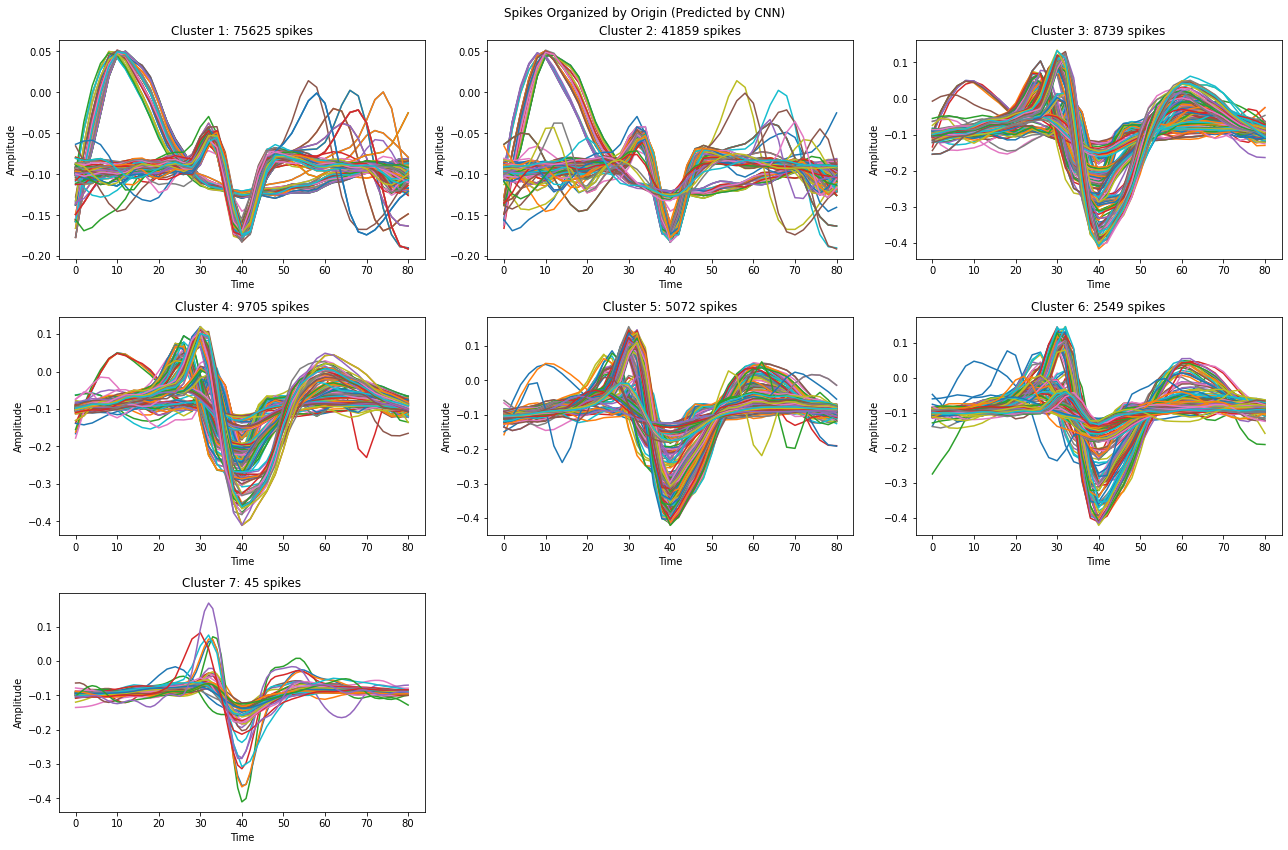

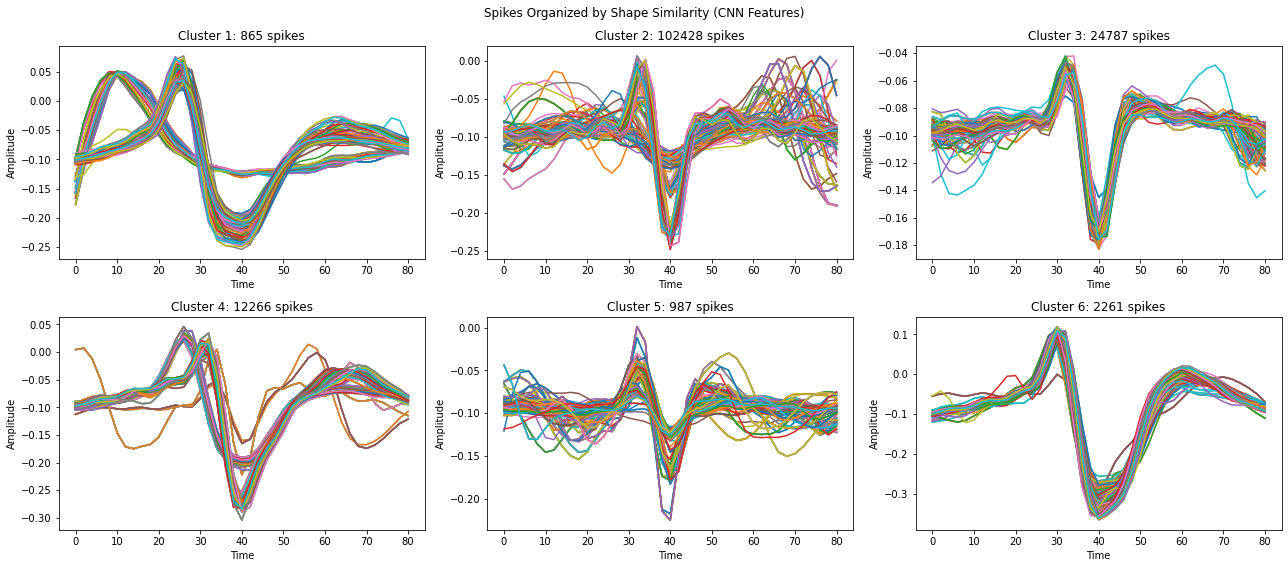

In [24]:
final_predictions = cnn_model.predict(X_test)
predicted_labels = np.argmax(final_predictions, axis=1)

# Organize spikes based on origin (predicted by CNN) and shape similarity (from second clustering)
origin_spike_dict = {}
shape_spike_dict = {}

for idx, (origin_label, shape_label) in enumerate(zip(predicted_labels, shape_labels)):
    if origin_label not in origin_spike_dict:
        origin_spike_dict[origin_label] = []
    origin_spike_dict[origin_label].append(normalized_data[idx])

    if shape_label not in shape_spike_dict:
        shape_spike_dict[shape_label] = []
    shape_spike_dict[shape_label].append(normalized_data[idx])

def plot_spikes(spike_dict, title):
    n_clusters = len(spike_dict)
    n_cols = 3
    n_rows = (n_clusters + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4))
    for cluster, (ax, spikes) in enumerate(zip(axes.flatten(), spike_dict.values())):
        for spike in spikes[:200]:  # Plot first 200 spikes for each cluster
            ax.plot(spike, alpha=1)
        ax.set_title(f'Cluster {cluster + 1}: {len(spikes)} spikes')
        ax.set_xlabel('Time')
        ax.set_ylabel('Amplitude')
    for ax in axes.flatten()[n_clusters:]:
        ax.axis('off')
    plt.suptitle(title)
    plt.tight_layout() 
    plt.show()

plot_spikes(origin_spike_dict, 'Spikes Organized by Origin (Predicted by CNN)')
plot_spikes(shape_spike_dict, 'Spikes Organized by Shape Similarity (CNN Features)')


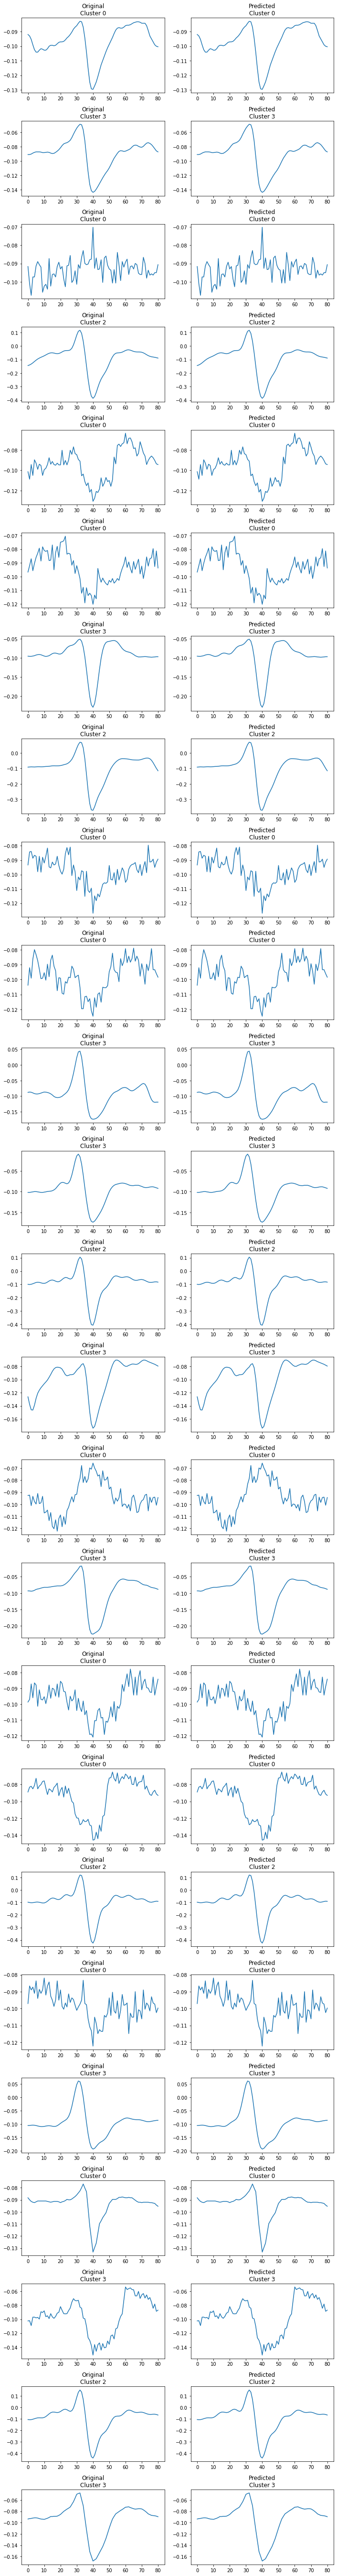

In [22]:
def visualize_spikes_before_after(data, labels, predictions, num_samples=25):
    fig, axes = plt.subplots(num_samples, 2, figsize=(10, num_samples * 3))

    for i in range(num_samples):
        # Plot original spike
        axes[i, 0].plot(data[i])
        axes[i, 0].set_title(f'Original\nCluster {labels[i]}')
        
        # Plot predicted spike
        predicted_label = predictions[i]
        axes[i, 1].plot(data[i])
        axes[i, 1].set_title(f'Predicted\nCluster {predicted_label}')
    
    plt.tight_layout()
    plt.show()
visualize_spikes_before_after(X_test.squeeze(), y_test, predicted_labels, num_samples=25)

## 2. Feature Extraction with CNN

In [9]:
def get_input_shape(data):
    spike_length = data.shape[1]
    num_channels = 1  # For 1D signals
    return (spike_length, num_channels)

input_shape = get_input_shape(normalized_data)
print("Input shape:", input_shape)

Input shape: (81, 1)


In [10]:
def build_cnn_model(input_shape):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(128, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(128, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(2, activation='softmax'))  # Binary classification
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def extract_features(model, data):
    # Create a new model that outputs the features from the last Conv1D layer
    feature_model = Model(inputs=model.input, outputs=model.layers[-4].output)
    features = feature_model.predict(data)
    return features

# Reshape the data for the CNN input
normalized_data_reshaped = normalized_data.reshape(normalized_data.shape[0], normalized_data.shape[1], 1)
input_shape = (normalized_data_reshaped.shape[1], 1)
cnn_model = build_cnn_model(input_shape)
features = extract_features(cnn_model, normalized_data_reshaped)
print("Extracted features shape:", features.shape)

Extracted features shape: (717966, 3, 128)


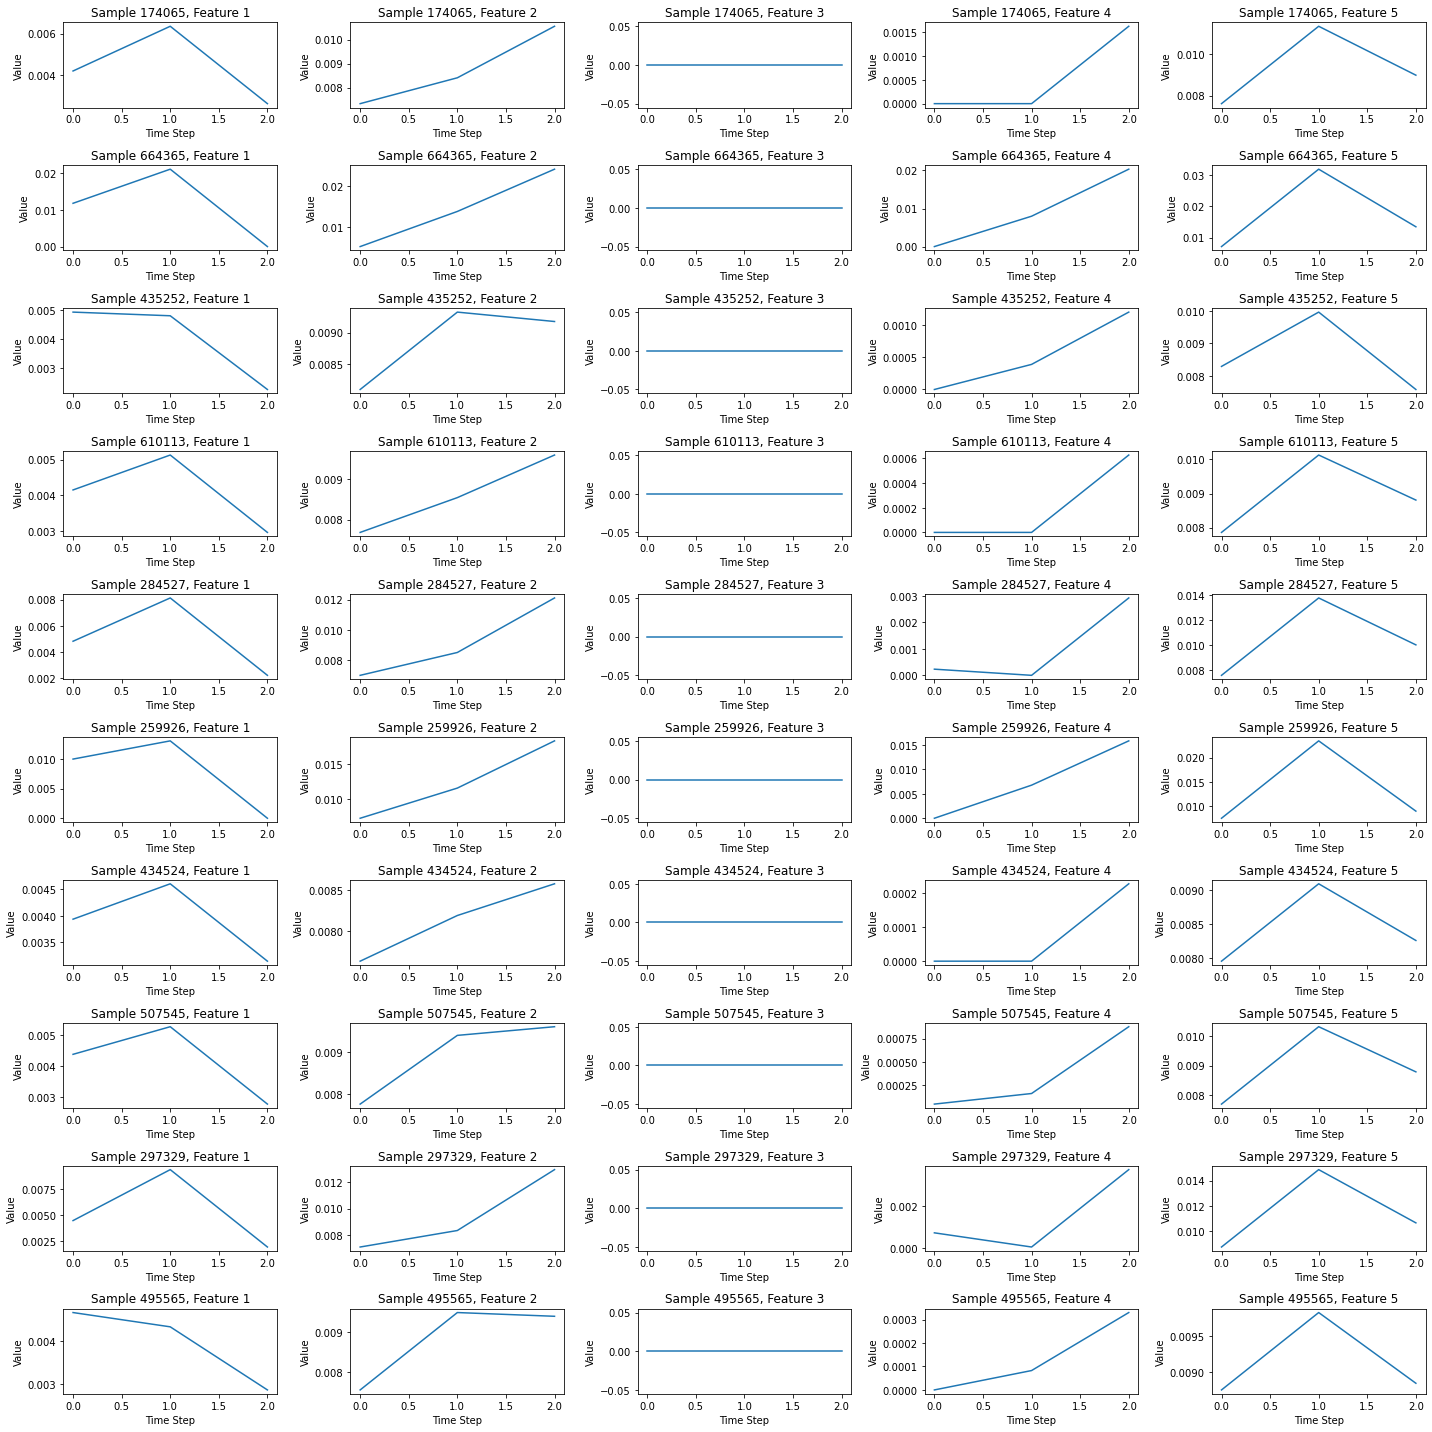

In [12]:
def visualize_features(features, num_samples=10, num_features=5):
    """
    Visualize a subset of the extracted features.

    :param features: numpy array of shape (num_samples, 3, 128)
    :param num_samples: number of samples to visualize
    :param num_features: number of features to visualize for each sample
    """
    total_samples = features.shape[0]
    total_features = features.shape[2]
    
    if num_samples > total_samples:
        raise ValueError(f"num_samples ({num_samples}) cannot be greater than total samples ({total_samples})")
    
    if num_features > total_features:
        raise ValueError(f"num_features ({num_features}) cannot be greater than total features ({total_features})")

    selected_samples = random.sample(range(total_samples), num_samples)
    
    plt.figure(figsize=(20, 20))

    for i, sample_idx in enumerate(selected_samples):
        for j in range(num_features):
            plt.subplot(num_samples, num_features, i * num_features + j + 1)
            plt.plot(features[sample_idx, :, j])
            plt.title(f'Sample {sample_idx + 1}, Feature {j + 1}')
            plt.xlabel('Time Step')
            plt.ylabel('Value')

    plt.tight_layout()
    plt.show()

visualize_features(features, num_samples=10, num_features=5)

## # 3. Spike Sorting with Recurrent Neural Network

In [18]:
extracted_features = np.random.rand(*features.shape) 

# Reshape features for RNN (assuming each "spike" is represented by 3 time steps)
X_train_reshaped = extracted_features.reshape(extracted_features.shape[0], extracted_features.shape[1], extracted_features.shape[2]) 
print('X train reshaped:', X_train_reshaped.shape) 

# Simulate labels (replace this with your actual label generation logic)
y_train = np.random.randint(0, 2, size=(X_train_reshaped.shape[0], X_train_reshaped.shape[1])) 
print('y train:', y_train.shape)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_reshaped, y_train, test_size=0.2, random_state=42)

# Define input shape for the LSTM
input_shape_rnn = (X_train_reshaped.shape[1], X_train_reshaped.shape[2])
print('Input Shape for the RNN:', input_shape_rnn)

X train reshaped: (717966, 3, 128)
y train: (717966, 3)
Input Shape for the RNN: (3, 128)


In [19]:
# Build the LSTM model for binary classification
def build_lstm_model(input_shape):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(128, activation='relu', input_shape=input_shape, return_sequences=True))
    model.add(tf.keras.layers.Dropout(0.5))  # Add dropout for regularization
    model.add(tf.keras.layers.LSTM(64, activation='relu', return_sequences=True))
    model.add(tf.keras.layers.Dropout(0.5))  # Add dropout for regularization
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid')) # Output a probability for each time step (same neuron or not)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), 
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])
    return model

# Build and fit the LSTM model
lstm_model = build_lstm_model(input_shape_rnn)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = lstm_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Prediction
predictions = lstm_model.predict(X_val)

# Evaluate the model
loss, accuracy = lstm_model.evaluate(X_val, y_val)
print(f'Model Loss: {loss}')
print(f'Model Accuracy: {accuracy}')

Epoch 1/50
17950/17950 [==============================] - 141s 8ms/step - loss: 0.6932 - accuracy: 0.4997 - val_loss: 0.6931 - val_accuracy: 0.5022
Epoch 2/50
17950/17950 [==============================] - 144s 8ms/step - loss: 0.6932 - accuracy: 0.4998 - val_loss: 0.6931 - val_accuracy: 0.5009
Epoch 3/50
17950/17950 [==============================] - 147s 8ms/step - loss: 0.6932 - accuracy: 0.5002 - val_loss: 0.6932 - val_accuracy: 0.5009
Epoch 4/50
17950/17950 [==============================] - 140s 8ms/step - loss: 0.6932 - accuracy: 0.4987 - val_loss: 0.6932 - val_accuracy: 0.4991
Epoch 5/50
17950/17950 [==============================] - 141s 8ms/step - loss: 0.6932 - accuracy: 0.4996 - val_loss: 0.6931 - val_accuracy: 0.5013
Epoch 6/50
17950/17950 [==============================] - 133s 7ms/step - loss: 0.6932 - accuracy: 0.5003 - val_loss: 0.6931 - val_accuracy: 0.5006
Epoch 7/50
17950/17950 [==============================] - 136s 8ms/step - loss: 0.6932 - accuracy: 0.4999 - val_

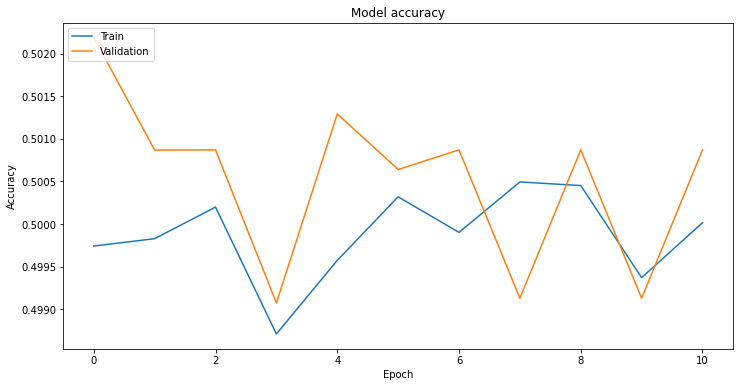

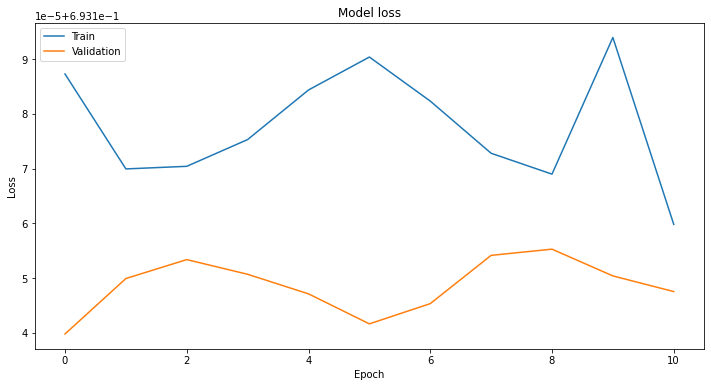

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [27]:
# Organize spikes based on classification
spike_dict = {}
for idx, spike_class in enumerate(classified_spikes):
    if spike_class not in spike_dict:
        spike_dict[spike_class] = []
    spike_dict[spike_class].append(normalized_data[idx])

# Output results
for neuron, spikes in spike_dict.items():
    print(f"Neuron {neuron + 1}: {len(spikes)} spikes")
    for spike in spikes[:5]:  # Print first 5 spikes for each neuron
        plt.plot(spike)
    plt.title(f"Neuron {neuron + 1}")
    plt.show()

## Main

In [ ]:
def main():
    # Load and preprocess data
    data = load_data(DATA_DIR)
    preprocessed_data = preprocess_data(data)
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(preprocessed_data['signals'], preprocessed_data['labels'], test_size=0.2, random_state=42)
    
    # Build and train CNN model
    cnn_model = build_cnn_model(X_train.shape[1:])
    cnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
    
    # Extract features using CNN
    train_features = extract_features(cnn_model, X_train)
    test_features = extract_features(cnn_model, X_test)
    
    # Build and train RNN model
    rnn_model = build_rnn_model(train_features.shape[1:])
    train_rnn_model(rnn_model, train_features, y_train)
    
    # Evaluate the model
    predictions = rnn_model.predict(test_features)
    accuracy = accuracy_score(y_test, np.argmax(predictions, axis=1))
    print(f'Accuracy: {accuracy * 100:.2f}%')
    
    # Visualize spikes
    visualize_spikes(data, 'Spikes Before Training')
    visualize_spikes(X_train, 'Spikes During Training')
    visualize_spikes(X_test, 'Spikes After Training')

# Run the main function
if __name__ == '__main__':
    main()